# Clustering the Countries by using Unsupervised Learning for HELP International
### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

## About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

## Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### Dataset Breakdown:

- `"country"`: Name of the country
- `"child_mort"`: Death of children under 5 years of age per 1000 live births
- `"exports"`: Exports of goods and services per capita. Given as %age of the GDP per capita
- `"health"`: Total health spending per capita. Given as %age of GDP per capita
- `"imports"`: Imports of goods and services per capita. Given as %age of the GDP per capita
- `"income"`: Net income per person
- `"inflation"`: The measurement of the annual growth rate of the Total GDP
- `"life_expec"`: The average number of years a new born child would live if the current mortality patterns are to remain the same
- `"total_fer"`: The number of children that would be born to each woman if the current age-fertility rates remain the same.
- `"gdpp"`: The GDP per capita. Calculated as the Total GDP divided by the total population.

# Importing Libraries

In [195]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# feature engineering
from sklearn.model_selection import train_test_split #splitting data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler # standarizing /scaling data

# model
from sklearn.cluster import KMeans #model
from sklearn.neighbors import KNeighborsClassifier #model
from statsmodels.stats.outliers_influence import variance_inflation_factor # multicollinearity

# metrics
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, silhouette_score

/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv
/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv


# Exploring Data

In [196]:
df = pd.read_csv('../datasets/country_data/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [197]:
# no missing values
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Most columns are scaled similar to each other, except income, gdpp, and total_fer. This means that we should consider scaling our data.


In [199]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


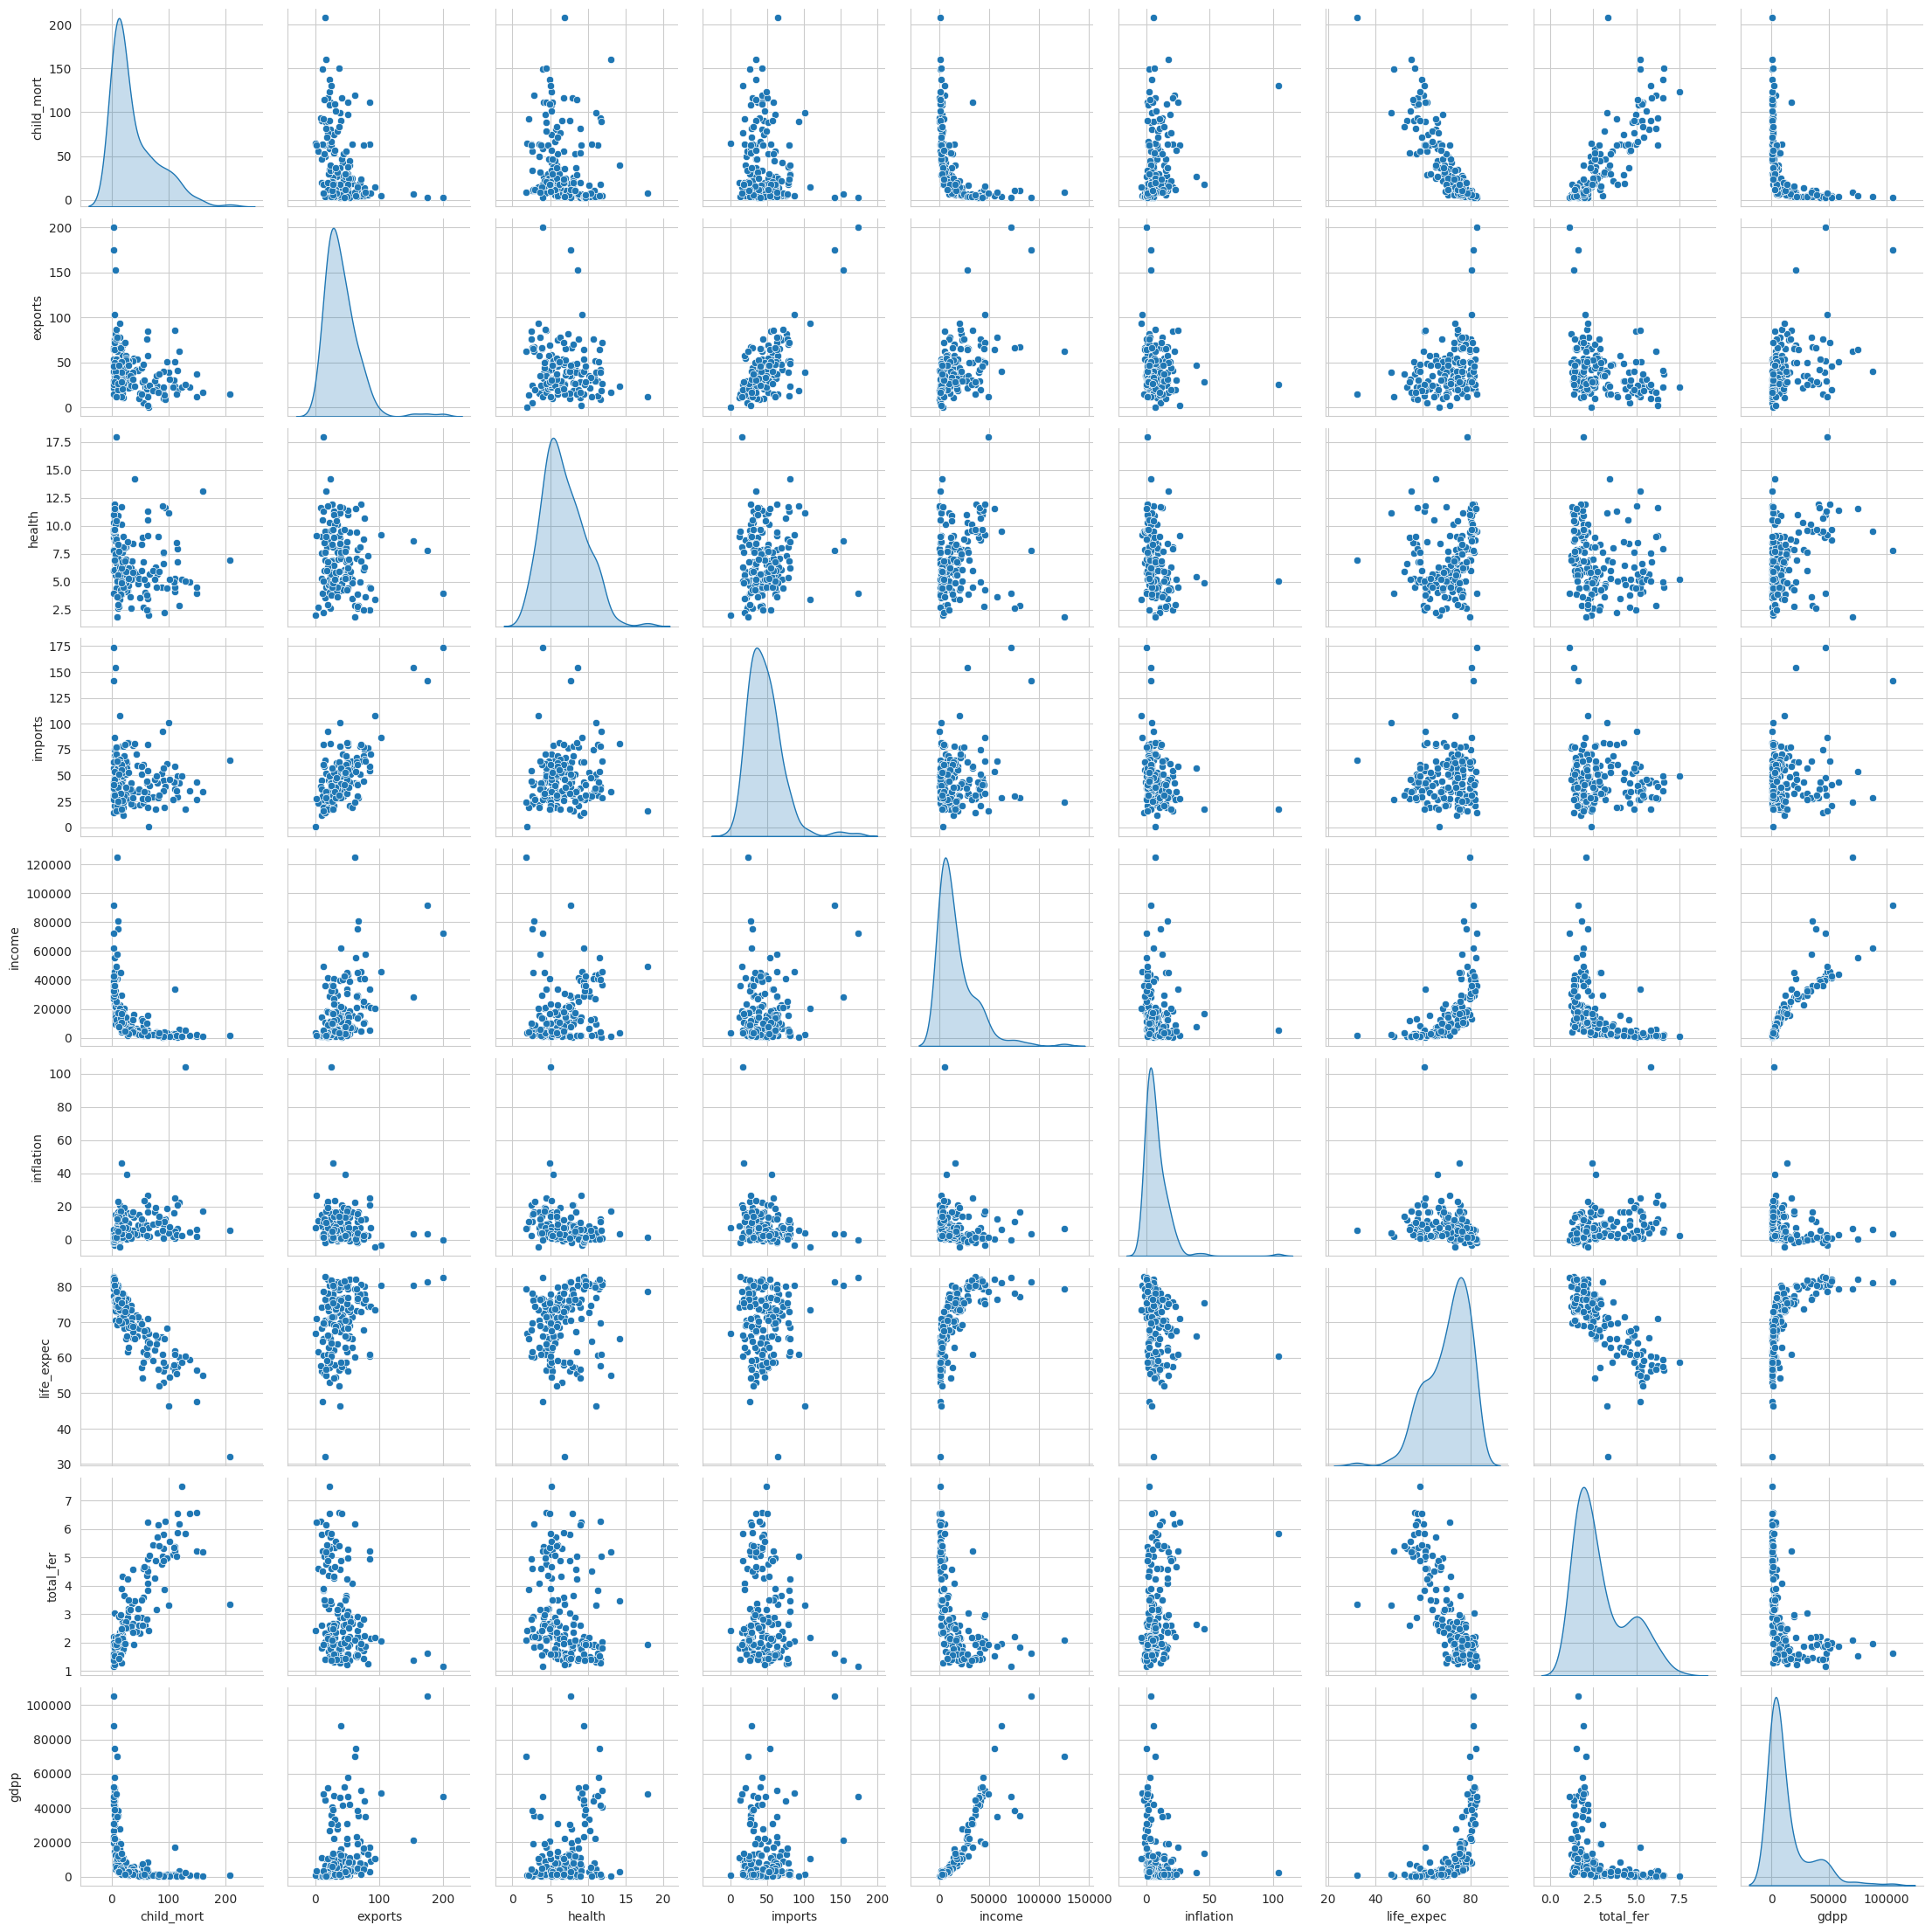

In [200]:
sns.pairplot(data=df,diag_kind='kde')

<Axes: xlabel='country', ylabel='health'>

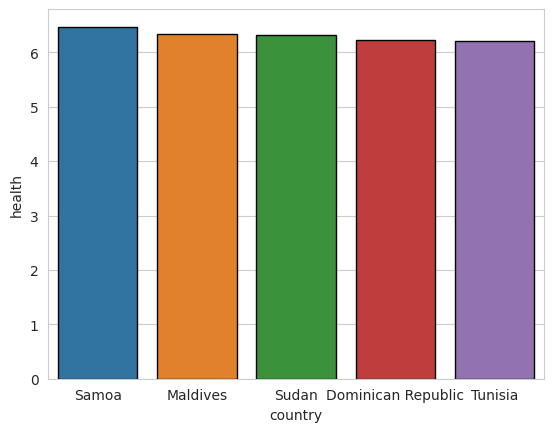

In [201]:
sns.barplot(x = 'country',y = 'health', data = df.sort_values(ascending = False,by = 'health').iloc[81:86],edgecolor = 'black')

<Axes: xlabel='country', ylabel='child_mort'>

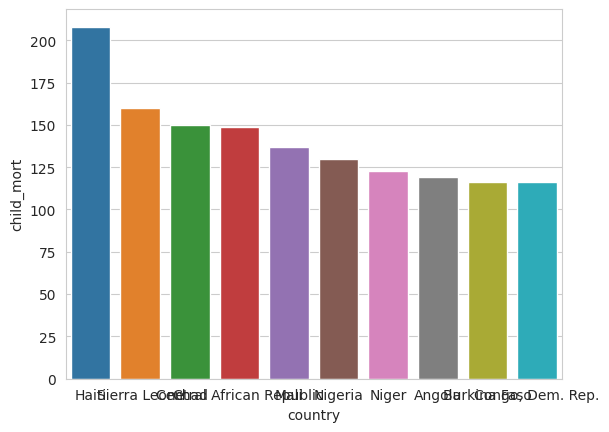

In [202]:
child_mort_country_list = df[['child_mort','country']].sort_values('child_mort',ascending=False).head(10)
sns.barplot(child_mort_country_list, x='country', y='child_mort',)

In [203]:
# exploring multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In this, we see that we have some feature that are heavily correlated with each other. However, because of the nature of the KMeans algorithm and our small dataset, this shouldnt be especailly significant.

In [204]:
# dropping the 'country' column since it's non-numeric
calc_vif(df.drop('country',axis=1))

,variables,VIF
0,child_mort,8.084814
1,exports,16.084236
2,health,12.421525
3,imports,17.280234
4,income,13.414051
5,inflation,1.985961
6,life_expec,21.916807
7,total_fer,17.673828
8,gdpp,10.298641


# Feature Engineering

In [205]:
# dataframe of numeric variables
data = df.drop(['country'],axis=1)

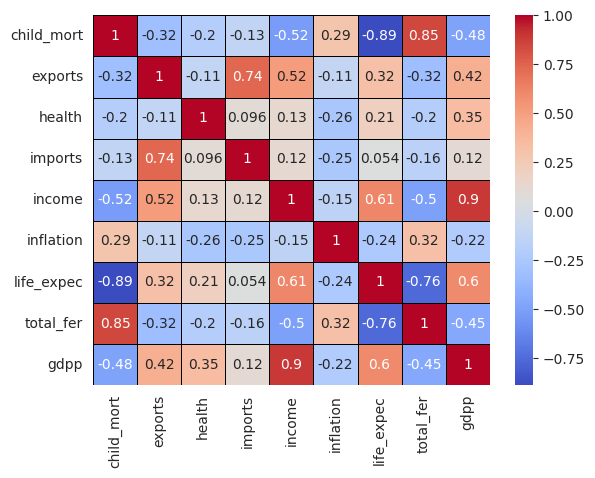

In [206]:
# checking for multicollinearity
sns.heatmap(
    data.corr(),annot=True,
    linecolor='black',linewidths=.5,
    cmap='coolwarm')

plt.show()

From this heatmap we see that...
 - **child_mort** is realted to total_fer, life_expec, income
 - **export** is related to income and imports
 - **heath** is slightly related to gdpp and child_mort
 - **income** is very strongly related to life_expec
 - **gdpp** and income go hand-in-hand
 
-------------------------------------------------------------------------------
 
Since many features go together, we will combine them into seperate DataFrames.

In [207]:
df1 = pd.DataFrame()
df1['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
df1['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
df1['Finance'] = (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'].mean())
df1.head()

,Health,Trade,Finance
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150


### Scaling Data
Machine learning models do not understand the units of the values of the features. They treat the inputs as a simple number without understanding the true meaning of that value. Thus, it becomes necessary to scale the data.

There are two choices to select from when scaling data: Normalizing and Standardizing
- Normalizing occurs when data is normally distributed
- Standarzdizing usually happens when data is normally distributed, just the values are on different scales than other features

Since our data isn't normally distributed, we will opted for normalization.

In [208]:
minmaxscale = MinMaxScaler() # Normalization
standardscaler = StandardScaler() # Standardization

df1['Health'] = minmaxscale.fit_transform(df1[['Health']])
df1['Trade'] = minmaxscale.fit_transform(df1[['Trade']])
df1['Finance'] = minmaxscale.fit_transform(df1[['Finance']])
df1.insert(loc = 0, value = list(df['country']), column = 'Country')
df1.head()

,Country,Health,Trade,Finance
0,Afghanistan,0.625740,0.139614,0.079820
1,Albania,0.127451,0.199901,0.088756
2,Algeria,0.182485,0.186622,0.212808
3,Angola,0.661381,0.283058,0.236946
4,Antigua and Barbuda,0.116409,0.275189,0.145043


### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is used for dimensionality reduction, feature extraction, noise reduction, visualization of high-dimensional data, handling multicollinearity, improving model performance, and data compression in order to simplify analysis and uncover patterns in datasets.








Before we run PCA, we will scale and normalize our data first!

In [209]:
# first making a copy of the data
df_scaled = df.copy()

# grabbing a list of the columns 
col = list(df.select_dtypes('number').columns)
col.remove('health');

# 'health' is normally distributed --> scaling
df_scaled['health'] = standardscaler.fit_transform(df2[['health']]) # Standardization

for i in col:
    df_scaled[i] = minmaxscale.fit_transform(df_scaled[[i]]) # Normalization
df_scaled.drop(columns = ['country'],inplace = True) 
df_scaled.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.279088,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,-0.097016,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,-0.966073,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,-1.448071,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,-0.286894,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


explained_variance_ returns a list of how each feature varies in the data frame.

In [210]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(df_scaled))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

The Eigen values in the graph correspond to the features in our data frame. The larger the step in the graph means the more variance or significance that feature holds. Usually eigen values with more than 95% are selected.

As we can see, the eigen values up to 2 have high variance, and the ones following them level off.

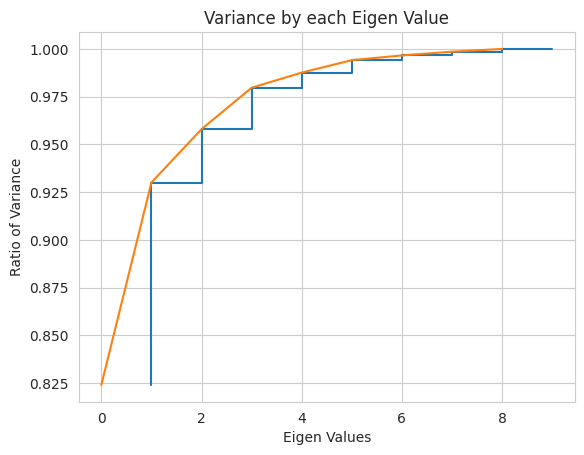

In [211]:
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,10)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,9)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

In [212]:
# selecting most relavent eigen values
pca_df = pca_df.drop(columns = list(range(3,9)))
pca_df.head()

,0,1,2
0,0.220482,0.640048,0.086112
1,-0.080903,-0.172000,-0.208695
2,-0.961283,-0.125199,-0.126719
3,-1.505914,0.472144,0.284978
4,-0.264724,-0.237308,-0.059150


# Modeling

#### Now we have two dataframes to test against and compare!
- Feature combination where we looked at the correlation of features in the orignal dataset
- PCA dataset where we used dimensionality reduction techniques 


Unsupervised learning is a machine learning paradigm where the algorithm learns patterns and structures from unlabeled data without explicit guidance. In this context, we'll be employing unsupervised learning to extract meaningful insights and patterns from the data without predefined labels for the given problem.

In [213]:
m1 = df1.drop(columns = ['Country']).values # Feature Combination : Health - Trade - Finance
m2 = pca_df.values # PCA Data

## What model will we be using?

**K-means clustering** 
- Unsupervised machine learning algorithm used for partitioning a dataset into K distinct, non-overlapping subsets (clusters).
- It aims to group similar data points together based on their features, with the number of clusters (K) specified by the user.
- The algorithm iteratively assigns data points to clusters and adjusts cluster centroids until convergence, seeking to minimize the sum of squared distances between data points and their assigned cluster centroids.


#### Hyper parameter tuning
In order to select the best set of parameters for our model so it preforms the best it possibly can we can use a variety of methods....

- Elbow Method:
 - Vary the number of clusters (K).
  - For each K, compute the sum of squared distances from each point to its assigned cluster center.
  - Plot the results and look for the "elbow" point, where the rate of decrease in sum of squared distances slows down. This point may indicate the optimal number of clusters.
  
-Silhouette Score:
  - Compute the silhouette score for different values of K.
  - The silhouette score measures how well-defined the clusters are. A higher silhouette score indicates better-defined clusters.
  - Choose the K with the highest silhouette score.
  
- Grid Search:
  - Conduct a grid search over a predefined range of hyperparameter values.
  - Evaluate the model performance using a validation set or cross-validation.
  - Choose the hyperparameters that result in the best performance.
  
Out of these methods, we will go down the visual route and choose the Elbow method and Silhouette score.


<h2 style="text-align: center;">Feature Combination Data</h2>



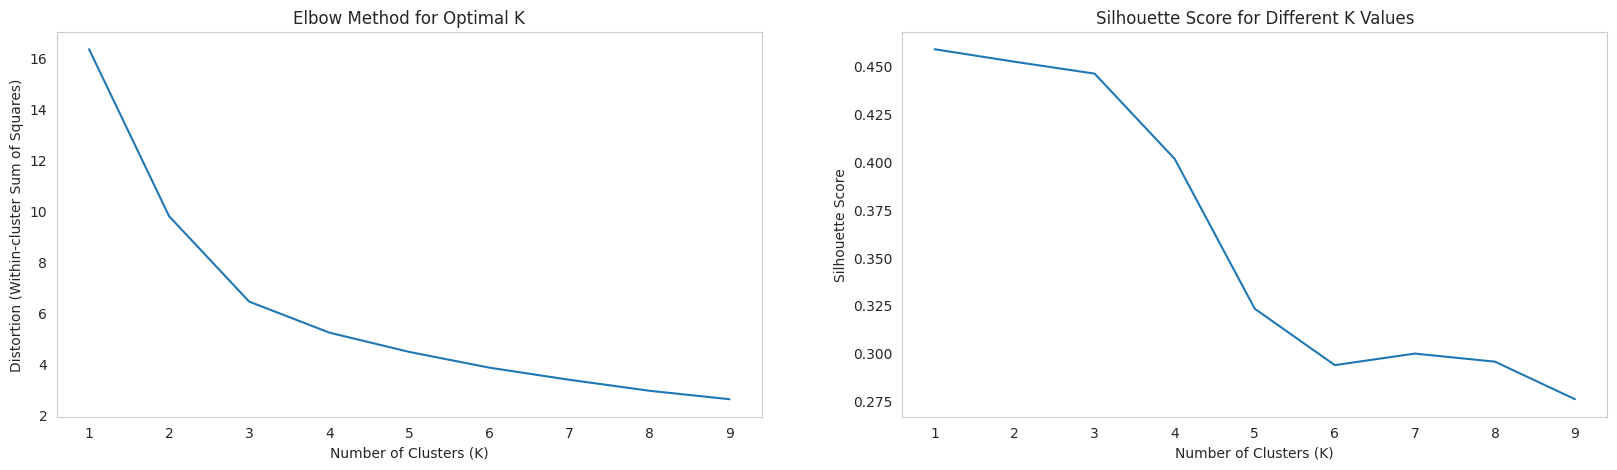

In [214]:
import warnings
warnings.filterwarnings("ignore")

silhouette_scores = [];kmax = 10 # max number of k values
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
distortions = []
possible_k_values = range(1, 10) 

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(m1)
    distortions.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(possible_k_values, distortions)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Within-cluster Sum of Squares)')
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2,kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(m1)
    silhouette_avg = silhouette_score(m1, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette Score
plt.plot(possible_k_values, silhouette_scores)
plt.title('Silhouette Score for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid()

plt.show()

#### From these results we will select...
- **** k: Clusters = 3****

In [215]:
# fitting model
model = KMeans(n_clusters = 3,max_iter = 1000)
model.fit(m1)
cluster = model.cluster_centers_
labels = model.labels_
df['Class'] = labels; df1['Class'] = labels; df1['Labels'] = labels

Let's plot the clusters in order to figure out which one corresponds with the level of help a nation needs!

Because we know that nations are more likely to need help if they have **high child mortality** and **low income**, we can plot these two features as bloxplots, showing which class they belong to

From these plots we can conclude...
- **1: Help Needed** -> High child_mort and low income
- **2: Help Might Needed** -> Medium child_mort and low income
- **0: No Help Needed** -> Low child_mort and high income

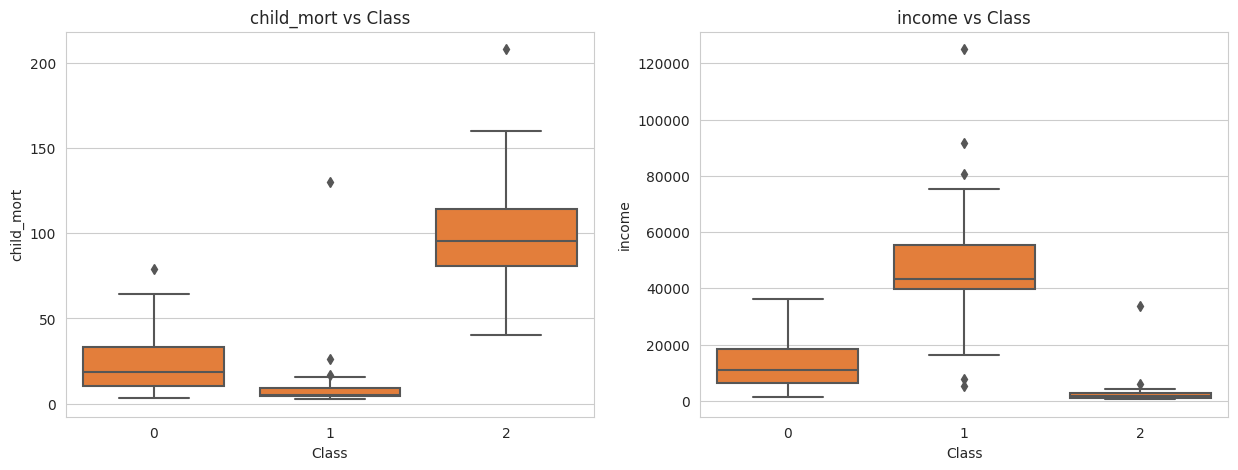

In [216]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = df, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = df, color = '#FF781F');
plt.title('income vs Class')

plt.show()

Let's take this one step further and graph this onto a map of the world, divided by countries!

In [217]:
df1['Class'].loc[df1['Labels'] == 0] = 'No Help Needed'
df1['Class'].loc[df1['Labels'] == 1] = 'Help Needed'
df1['Class'].loc[df1['Labels'] == 2] = 'Might Need Help'

In [218]:
fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                          'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')


<h2 style="text-align: center;">PCA Data</h2>



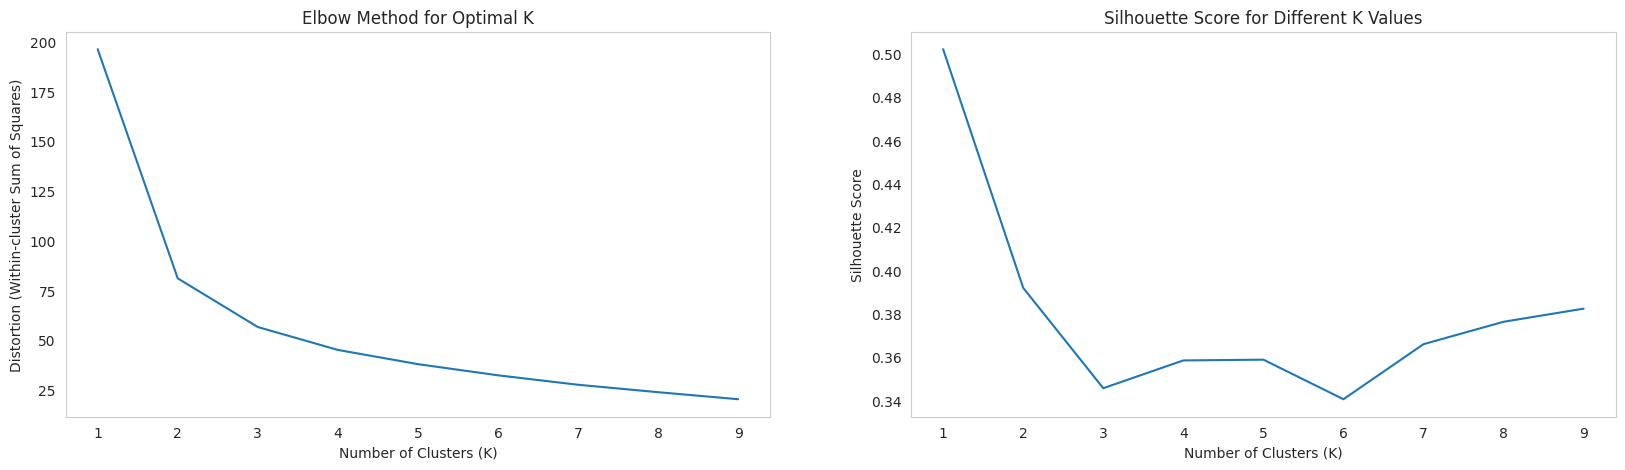

In [219]:
import warnings
warnings.filterwarnings("ignore")

silhouette_scores = [];kmax = 10 # max number of k values
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
distortions = []
possible_k_values = range(1, 10) 

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(m2)
    distortions.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(possible_k_values, distortions)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Within-cluster Sum of Squares)')
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2,kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(m2)
    silhouette_avg = silhouette_score(m2, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette Score
plt.plot(possible_k_values, silhouette_scores)
plt.title('Silhouette Score for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid()

plt.show()

#### From these results we will select...
- **** k: Clusters = 3****

In [220]:
# fitting model
model = KMeans(n_clusters = 3,max_iter = 1000)
model.fit(m2)
labels = model.labels_
df['Class']=labels; pca_df['Class'] = labels; pca_df['Labels'] = labels

From these plots we can conclude...
- **1: Help Needed** -> High child_mort and low income
- **0: Help Might Needed** -> Medium child_mort and low income
- **2: No Help Needed** -> Low child_mort and high income

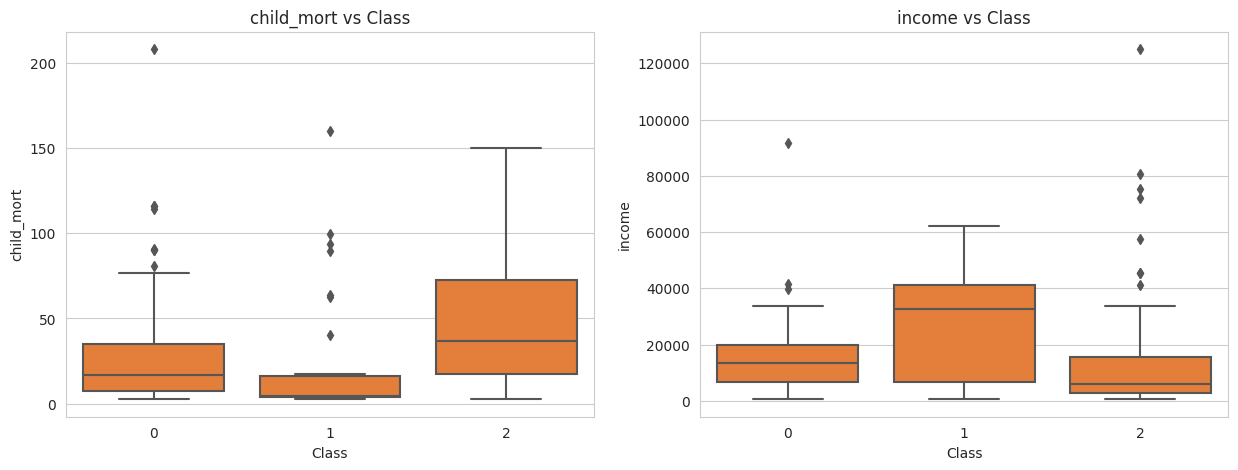

In [221]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = df, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = df, color = '#FF781F');
plt.title('income vs Class')

plt.show()

In [222]:
pca_df.insert(0,column = 'Country', value = df['country'])

pca_df['Class'].loc[pca_df['Labels'] == 0] = 'Might Need Help'
pca_df['Class'].loc[pca_df['Labels'] == 1] = 'Help Needed'
pca_df['Class'].loc[pca_df['Labels'] == 2] = 'No Help Needed'

In [223]:
fig = px.choropleth(pca_df[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

------------------
<h1 style="text-align: center;">The End!</h1>
